In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,NaN,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,NaN,0.57,8.22,0.00,0.0
4,1.51742,NaN,3.62,1.24,73.08,0.55,NaN,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,NaN,0.00,2.88,NaN,0.08,9.18,1.06,0.0
210,1.51685,14.92,NaN,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,NaN,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	31
float64		column 3	20
float64		column 4	20
float64		column 5	21
float64		column 6	31
float64		column 7	26
float64		column 8	10
float64		column 9	25


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,214.000000,183.000000,194.000000,194.000000,193.000000,183.00000,188.000000,204.000000,189.000000
mean,1.518365,13.379071,2.741031,1.456237,72.651969,0.50224,8.981755,0.162941,0.056931
std,0.003037,0.820967,1.394639,0.492166,0.784411,0.54440,1.339892,0.479359,0.098527
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.00000,5.790000,0.000000,0.000000
25%,1.516522,12.930000,2.250000,1.192500,72.280000,0.18000,8.295000,0.000000,0.000000
50%,1.517680,13.290000,3.480000,1.380000,72.790000,0.56000,8.645000,0.000000,0.000000
75%,1.519157,13.725000,3.610000,1.630000,73.080000,0.61000,9.142500,0.000000,0.090000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.21000,16.190000,3.150000,0.510000


<AxesSubplot:>

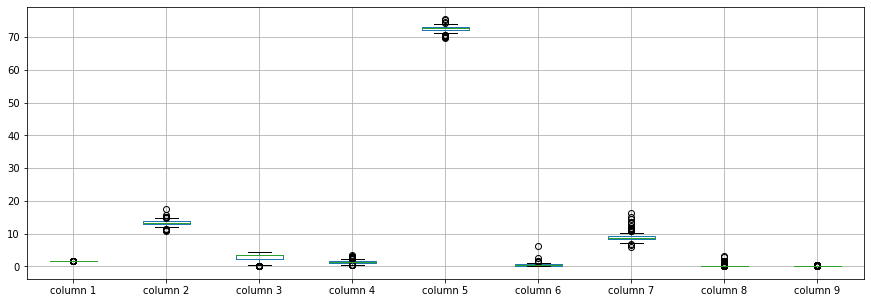

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518365
column 2    13.379071
column 3     2.741031
column 4     1.456237
column 5    72.651969
column 6     0.502240
column 7     8.981755
column 8     0.162941
column 9     0.056931
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.232621,-0.126367,-0.380970,-0.581203,-0.285819,0.810857,0.040474,0.148664
column 2,-0.232621,1.000000,-0.205127,0.056660,0.009982,-0.292337,-0.311762,0.293127,-0.209033
column 3,-0.126367,-0.205127,1.000000,-0.516505,-0.165534,0.044845,-0.475706,-0.494495,0.086697
column 4,-0.380970,0.056660,-0.516505,1.000000,0.004761,0.309702,-0.140584,0.430290,-0.082985
column 5,-0.581203,0.009982,-0.165534,0.004761,1.000000,-0.090376,-0.368709,-0.082363,-0.106538
column 6,-0.285819,-0.292337,0.044845,0.309702,-0.090376,1.000000,-0.297274,-0.010524,0.010914
column 7,0.810857,-0.311762,-0.475706,-0.140584,-0.368709,-0.297274,1.000000,0.021584,0.132887
column 8,0.040474,0.293127,-0.494495,0.430290,-0.082363,-0.010524,0.021584,1.000000,-0.027105
column 9,0.148664,-0.209033,0.086697,-0.082985,-0.106538,0.010914,0.132887,-0.027105,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+29,9+29+29,9+29+29+29,9+29+29+29+29,9+29+29+29+29+29,9+29+29+29+29,9+29+29+29,9+29+29,9+29,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 91.52892068716196
Epoch: 1 , loss: 91.91946528508113
Epoch: 2 , loss: 91.47979384202223
Epoch: 3 , loss: 91.81951962984525
Epoch: 4 , loss: 91.41373560978816
Epoch: 5 , loss: 91.58976100041316
Epoch: 6 , loss: 91.33710479736328
Epoch: 7 , loss: 91.7152322622446
Epoch: 8 , loss: 91.31544670691856
Epoch: 9 , loss: 91.3723126924955
Epoch: 10 , loss: 91.66934204101562
Epoch: 11 , loss: 91.68584559513972
Epoch: 12 , loss: 92.07302152193509
Epoch: 13 , loss: 91.7074215228741
Epoch: 14 , loss: 91.68724940373347
Epoch: 15 , loss: 91.70535454383263
Epoch: 16 , loss: 91.7629148043119
Epoch: 17 , loss: 91.34594374436598
Epoch: 18 , loss: 91.73024104191707
Epoch: 19 , loss: 91.21405674861028
Epoch: 20 , loss: 92.07954758864183
Epoch: 21 , loss: 92.2206291785607
Epoch: 22 , loss: 91.40233318622296
Epoch: 23 , loss: 91.32987976074219
Epoch: 24 , loss: 91.70447305532602
Epoch: 25 , loss: 91.88596754807692
Epoch: 26 , 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.519660
column 2    14.770000
column 3     3.750000
column 4     0.290000
column 5     0.394927
column 6     0.030000
column 7     9.000000
column 8     0.000000
column 9     0.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.000000,0.000000,0.0,0.000000,0.625367,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.000000,0.000000,0.0,-71.969408,0.000000,0.000000,0.0,0.0
4,0.0,-12.884471,0.000000,0.0,0.000000,0.000000,-7.681382,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,-13.777480,0.000000,0.0,-72.243676,0.000000,0.000000,0.0,0.0
210,0.0,0.000000,0.443044,0.0,0.000000,0.000000,0.000000,0.0,0.0
211,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
212,0.0,-14.221970,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(342.05313137432734, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.31368474367092314

In [18]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     3.650000
column 4     0.335567
column 5    72.220000
column 6     0.309469
column 7     9.850000
column 8     0.000000
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.640000,4.490000,1.10,71.780000,0.685367,8.750000,0.00,0.0
1,1.51761,13.890000,3.600000,1.36,72.730000,0.480000,7.830000,0.00,0.0
2,1.51618,13.530000,3.550000,1.54,72.990000,0.390000,7.780000,0.00,0.0
3,1.51766,13.210000,3.690000,1.29,0.640592,0.570000,8.220000,0.00,0.0
4,1.51742,0.385529,3.620000,1.24,73.080000,0.550000,0.388618,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,0.362520,0.000000,2.88,0.366324,0.080000,9.180000,1.06,0.0
210,1.51685,14.920000,0.443044,1.99,73.060000,0.000000,8.400000,1.59,0.0
211,1.52065,14.360000,0.000000,2.02,73.420000,0.000000,8.440000,1.64,0.0
212,1.51651,0.158030,0.000000,1.94,73.610000,0.000000,8.480000,1.57,0.0


In [20]:
imputations[-1].to_excel("Glass_NG_10(imp).xlsx", index=False, header=False)